In [4]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange


In [11]:
pip install tqdm


The following command must be run outside of the IPython shell:

    $ pip install tqdm

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [35]:
class Bandit1:
    def __init__(self):
        self.q_opt = np.random.normal(0,1,10)
        self.K = np.zeros(10)
        self.est_values = np.zeros(10)
        self.best_action = np.argmax(self.q_opt)
        
    def choose_action(self,epsilon):
        rand_num = np.random.random()
        if epsilon>rand_num:
            return np.random.randint(10)
        else:
            return np.argmax(self.est_values)
        
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.q_opt[action] + noise
        return reward   
    
    def update_est(self,action,reward):
        self.K[action] += 1
        self.est_values[action] += (reward - self.est_values[action]) / self.K[action]

In [19]:
def experiment(bandit,Npulls,epsilon):
    history_rew= []
    history_best= []
    for i in range(Npulls):
        action = bandit.choose_action(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        history_rew.append(R)
        if action == bandit.best_action:
            history_best.append(1)
        else:
            history_best.append(0)
    return np.array(history_rew),np.array(history_best)

In [36]:
Nexp = 2000
Npulls = 1000

avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)
best_outcome_eps0p0 = np.zeros(Npulls)
best_outcome_eps0p01 = np.zeros(Npulls)
best_outcome_eps0p1 = np.zeros(Npulls)


for i in trange(Nexp):
    bandit = Bandit1()
    A,B= experiment(bandit,Npulls,0.0)
    avg_outcome_eps0p0 +=A
    best_outcome_eps0p0 +=B
    bandit = Bandit1()
    A,B= experiment(bandit,Npulls,0.01)
    avg_outcome_eps0p01 +=A
    best_outcome_eps0p01 +=B
    bandit = Bandit1()
    A,B= experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p1 +=A
    best_outcome_eps0p1 +=B

avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p01 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)

best_outcome_eps0p0 /= np.float(Nexp)
best_outcome_eps0p01 /= np.float(Nexp)
best_outcome_eps0p1 /= np.float(Nexp)


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:23<00:00, 23.89it/s]


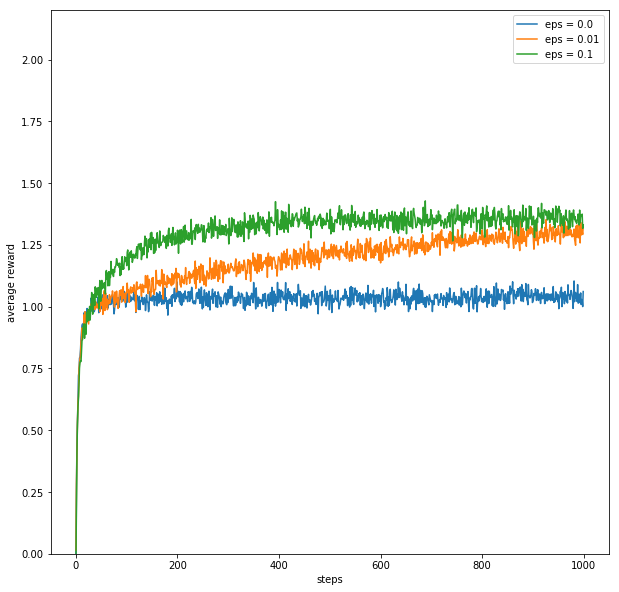

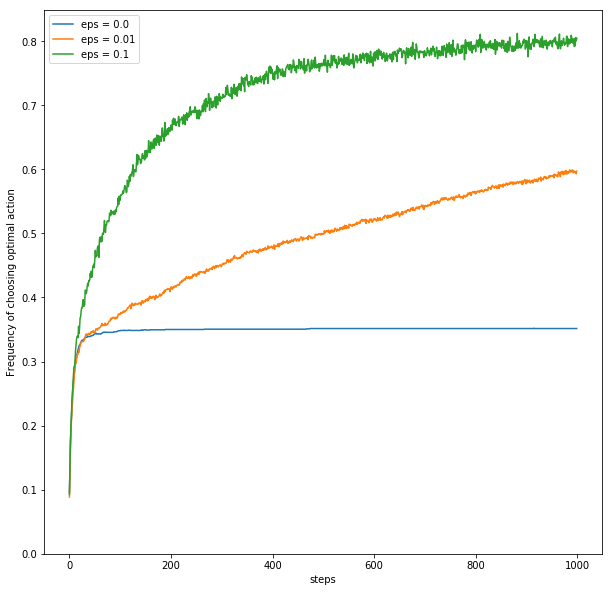

In [37]:
plt.figure(figsize=(10, 10))
plt.plot(avg_outcome_eps0p0,label="eps = 0.0")
plt.plot(avg_outcome_eps0p01,label="eps = 0.01")
plt.plot(avg_outcome_eps0p1,label="eps = 0.1")
plt.ylim(0,2.2)
plt.legend()
plt.xlabel('steps')
plt.ylabel('average reward')
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(best_outcome_eps0p0,label="eps = 0.0")
plt.plot(best_outcome_eps0p01,label="eps = 0.01")
plt.plot(best_outcome_eps0p1,label="eps = 0.1")
plt.ylim(0,)
plt.legend()
plt.xlabel('steps')
plt.ylabel('Frequency of choosing optimal action')
plt.show()


In [60]:
class Bandit2:
    def __init__(self,est0):
        self.q_opt = np.random.normal(0,1,10)
        self.K = np.zeros(10)
        self.est0=est0
        self.est_values = np.zeros(10)+est0
        self.best_action = np.argmax(self.q_opt)
        
    def choose_action(self,epsilon):
        rand_num = np.random.random()
        if epsilon>rand_num:
            return np.random.randint(10)
        else:
            return np.argmax(self.est_values)
        
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.q_opt[action] + noise
        return reward   
    
    def update_est(self,action,reward):
        self.K[action] += 1
        alpha=0.1
        self.est_values[action] += alpha * (reward - self.est_values[action])
    

In [61]:
def experiment(bandit,Npulls,epsilon):
    history_rew= []
    history_best= []
    for i in range(Npulls):
        action = bandit.choose_action(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        history_rew.append(R)
        if action == bandit.best_action:
            history_best.append(1)
        else:
            history_best.append(0)
    return np.array(history_rew),np.array(history_best)

In [62]:
Nexp = 2000
Npulls = 1000
avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)
best_outcome_eps0p0 = np.zeros(Npulls)
best_outcome_eps0p1 = np.zeros(Npulls)


for i in trange(Nexp):
    bandit = Bandit2(5)
    A,B= experiment(bandit,Npulls,0.0)
    avg_outcome_eps0p0 +=A
    best_outcome_eps0p0 +=B
    bandit = Bandit2(0)
    A,B= experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p1 +=A
    best_outcome_eps0p1 +=B

avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)

best_outcome_eps0p0 /= np.float(Nexp)
best_outcome_eps0p1 /= np.float(Nexp)


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:04<00:00, 31.21it/s]


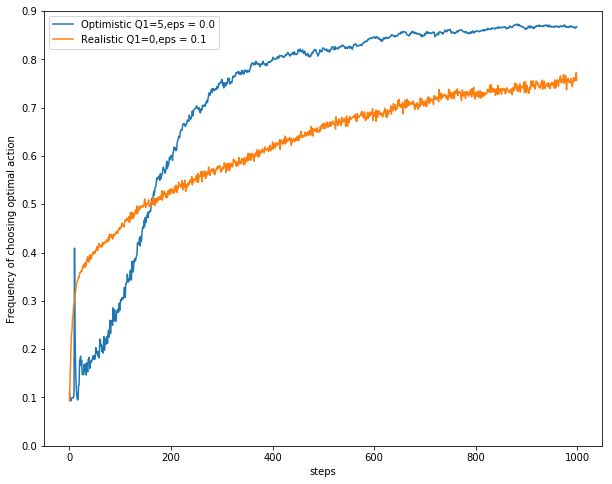

In [63]:
plt.figure(figsize=(10,8 ))
plt.plot(best_outcome_eps0p0,label="Optimistic Q1=5,eps = 0.0")
plt.plot(best_outcome_eps0p1,label="Realistic Q1=0,eps = 0.1")
plt.ylim(0,0.9)
plt.legend()
plt.xlabel('steps')
plt.ylabel('Frequency of choosing optimal action')
plt.show()

In [69]:
class Bandit3:
    def __init__(self):
        self.q_opt = np.random.normal(0,1,10)
        self.K = np.zeros(10)
        self.est_values = np.zeros(10)
        self.best_action = np.argmax(self.q_opt)
        self.time = 0
        
    def choose_action(self,UCB_param):
        UCB_estimation = self.est_values  + \
            UCB_param * np.sqrt(np.log(self.time + 1) / (self.K + 1e-5))
        q_best = np.max(UCB_estimation)
        return np.random.choice(np.where(UCB_estimation == q_best)[0])
        
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.q_opt[action] + noise
        self.time+=1
        return reward   
        
    def update_est(self,action,reward):
        self.K[action] += 1
        self.est_values[action] += (reward - self.est_values[action]) / self.K[action]    

In [70]:
def experiment(bandit,Npulls,UCB_param):
    history_rew= []
    history_best= []
    for i in range(Npulls):
        action = bandit.choose_action(UCB_param)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        history_rew.append(R)
        if action == bandit.best_action:
            history_best.append(1)
        else:
            history_best.append(0)
    return np.array(history_rew),np.array(history_best)

In [71]:
Nexp = 2000
Npulls = 1000

avg_outcome_UCB2= np.zeros(Npulls)
best_outcome_UCB2= np.zeros(Npulls)

for i in trange(Nexp):
    bandit = Bandit3()
    A,B= experiment(bandit,Npulls,2)
    avg_outcome_UCB2+=A
    best_outcome_UCB2+=B
    
avg_outcome_UCB2/= np.float(Nexp)

best_outcome_UCB2/= np.float(Nexp)



100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:01<00:00, 16.43it/s]


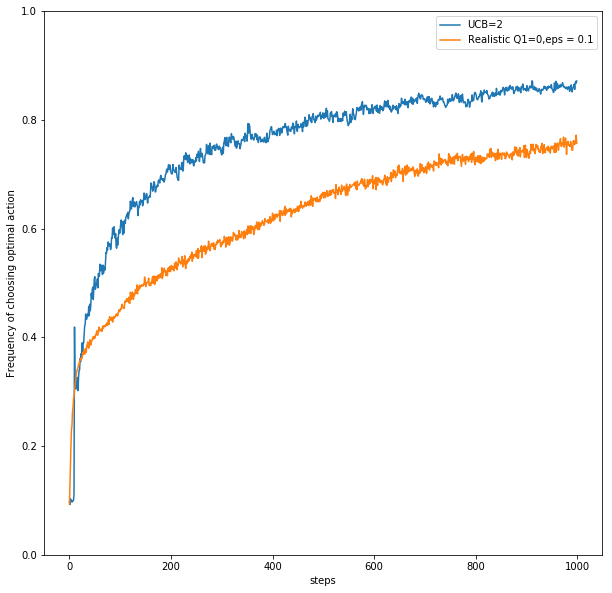

In [68]:
plt.figure(figsize=(10, 10))
plt.plot(best_outcome_UCB2,label="UCB=2")
plt.plot(best_outcome_eps0p1,label="Realistic Q1=0,eps = 0.1")
plt.ylim(0,1)
plt.legend()
plt.xlabel('steps')
plt.ylabel('Frequency of choosing optimal action')
plt.show()

In [55]:
class Bandit4:
    def __init__(self):
        self.q_opt = np.random.normal(0,1,10)
        self.est_values = np.zeros(10)
        self.average_reward = 0
        self.indices = np.arange(10)
        self.best_action = np.argmax(self.q_opt)
        self.time = 0
        
    def choose_action(self):
        exp_est = np.exp(self.est_values)
        self.action_prob = exp_est / np.sum(exp_est)
        return np.random.choice(self.indices, p=self.action_prob)
        
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.q_opt[action] + noise
        self.time += 1
        self.average_reward += (reward - self.average_reward) / self.time
        return reward,self.average_reward    
        
    def update_est(self,action,reward,average_reward):
        alpha=0.1
        one_hot = np.zeros(10)
        one_hot[action] = 1
        alpha=0.1
        self.est_values += alpha * (reward - average_reward) * (one_hot - self.action_prob)

In [56]:
def experiment(bandit,Npulls):
    history_rew= []
    history_best= []
    for i in range(Npulls):
        action = bandit.choose_action()
        R,AR = bandit.get_reward(action)
        bandit.update_est(action,R,AR)
        history_rew.append(R)
        if action == bandit.best_action:
            history_best.append(1)
        else:
            history_best.append(0)
    return np.array(history_rew),np.array(history_best)

In [57]:
Nexp = 2000
Npulls = 1000

avg_outcome_Grad= np.zeros(Npulls)
best_outcome_Grad= np.zeros(Npulls)

for i in trange(Nexp):
    bandit = Bandit4()
    A,B= experiment(bandit,Npulls)
    avg_outcome_Grad+=A
    best_outcome_Grad+=B
    
avg_outcome_Grad/= np.float(Nexp)
best_outcome_Grad/= np.float(Nexp)



100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:08<00:00, 10.63it/s]


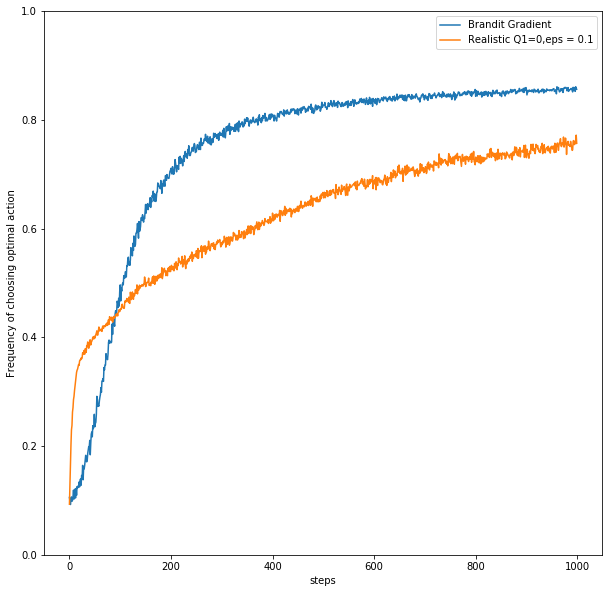

In [64]:
plt.figure(figsize=(10, 10))
plt.plot(best_outcome_Grad,label="Brandit Gradient")
plt.plot(best_outcome_eps0p1,label="Realistic Q1=0,eps = 0.1")
plt.ylim(0,1)
plt.legend()
plt.xlabel('steps')
plt.ylabel('Frequency of choosing optimal action')
plt.show()